# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file.

In [66]:
from scipy.io import loadmat

mat = loadmat('data/ejer_1_data1.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [37]:
from scipy.io import loadmat

mat = loadmat('data/ejer_1_data1.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [67]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [39]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 3. Create a DataFrame with the features and target

In [68]:
df = pd.DataFrame(mat['X'], columns=['X1', 'X2'])
df['y'] = mat['y']

In [69]:
df.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


,x1,x2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [70]:
df['y'].value_counts()

0    30
1    21
Name: y, dtype: int64

In [5]:
df['y'].value_counts()

0    30
1    21
Name: y, dtype: int64

#### 4. Plot a scatterplot with the data

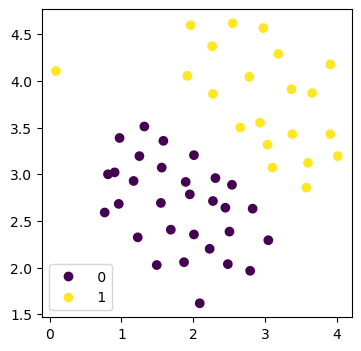

In [71]:
plt.figure(figsize=(4,4))
scatter=plt.scatter(data['X1'], df['X2'], c=df['y'])
plt.legend(handles=scatter.legend_elements()[0], labels=[' 0', ' 1'],loc='lower left')

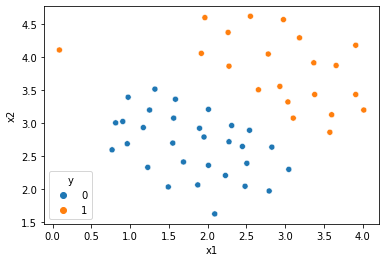

In [9]:
plt.figure()


Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [72]:
from sklearn.svm import LinearSVC


In [73]:
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, loss='hinge')

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [74]:
svc.fit(df[['X1', 'X2']], df['y'])
svc.score(df[['X1', 'X2']], df['y'])

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9803921568627451

In [14]:
svc.fit(df[['x1','x2']], df['y'])


0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [82]:
svc2 = svm.LinearSVC(C=115, loss='hinge', max_iter=1000)
svc2.fit(df[['X1', 'X2']], df['y'])
svc2.score(df[['X1', 'X2']], df['y'])

c:\Users\mareg\anaconda3\envs\general\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1.0

In [21]:

svc_2.fit(df[['x1','x2']], df['y'])
svc_2.score(df[['x1','x2']], df['y'])

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.


#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [83]:
conf_level = svc.decision_function(df[['X1','X2']])

In [77]:

conf_level

array([ 0.8121187 ,  0.38869492,  1.38466564,  0.52306212,  0.33036959,
        0.86661464,  0.68690116,  1.61452905,  0.83926692,  1.17539796,
        1.07618998,  0.22881859,  0.33832561,  0.80332573,  0.31795119,
        1.27940366,  1.21237364,  0.99933602,  0.56307771,  0.39034074,
       -0.43177295, -0.30697827, -0.68650211, -0.5552599 , -0.33251273,
       -0.29657154, -0.44564246, -0.98920131, -0.68904431, -1.33241732,
       -1.00642062, -1.4936049 , -0.61084898, -0.68142285, -1.        ,
       -1.15448668, -1.5817881 , -1.35487903, -1.03038841, -1.1819722 ,
       -0.76658874, -0.76365973, -0.46168705, -1.0038523 , -0.51228245,
       -0.86482198, -1.56571417, -0.25571501, -1.11064491, -1.54620345,
       -0.69963735])

In [26]:
conf_level

array([ 0.80278593,  0.3838553 ,  1.37742261,  0.52109694,  0.33331643,
        0.86860562,  0.68644079,  1.61112044,  0.83441571,  1.16707374,
        1.07316037,  0.22972916,  0.331777  ,  0.79575449,  0.31573087,
        1.27401816,  1.21010843,  0.99988323,  0.56465913,  0.38981932,
       -0.43527164, -0.30885316, -0.68626448, -0.5540297 , -0.33251787,
       -0.29385666, -0.4407223 , -0.9840001 , -0.68564223, -1.32848517,
       -1.00379796, -1.49230926, -0.61142573, -0.68344774, -1.00004185,
       -1.15274784, -1.57841683, -1.35598344, -1.03239924, -1.18504121,
       -0.7714105 , -0.76692628, -0.46650197, -1.        , -0.51034432,
       -0.85864953, -1.55903573, -0.25490236, -1.11364769, -1.54719253,
       -0.70993965])

In [78]:
df.columns  

Index(['X1', 'X2', 'y'], dtype='object')

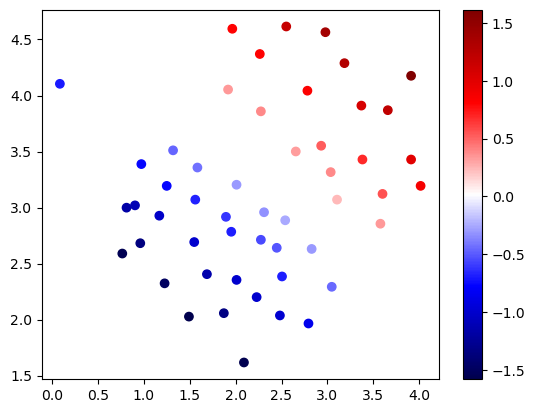

In [79]:
plt.scatter(df['X1'], df['X2'], c = conf_level, cmap='seismic')
plt.colorbar();

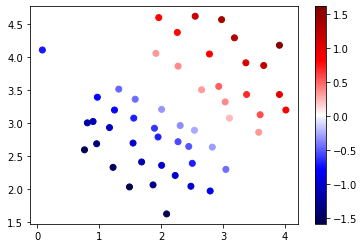

In [30]:
plt.scatter(df['x1'], df['x2'], c = conf_level, cmap='seismic')
plt.colorbar();

#### 9. Do the same with the second model

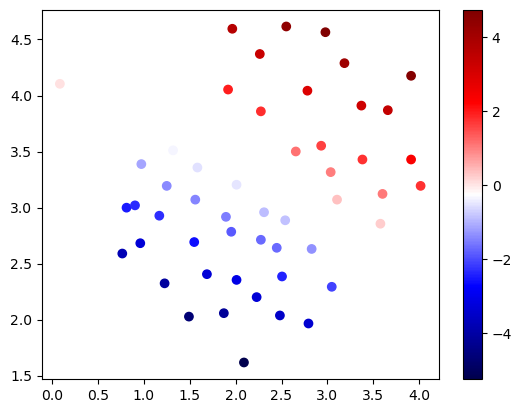

In [86]:
conf_level = svc2.decision_function(df[['X1','X2']])
plt.scatter(df['X1'], df['X2'], c = conf_level, cmap='seismic')
plt.colorbar();

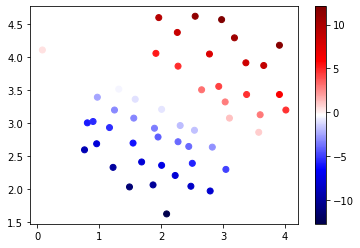

In [31]:
conf_level = svc_2.decision_function(df[['x1','x2']])
plt.scatter(df['x1'], df['x2'], c = conf_level, cmap='seismic')
plt.colorbar();

In [87]:
svc2.coef_[0]

array([1.14528207, 3.0481188 ])

In [35]:
svc_2.coef_[0]

array([2.82928536, 7.55642651])

In [89]:
svc2.intercept_

array([-12.58581876])

In [33]:
svc_2.intercept_

array([-30.85257297])

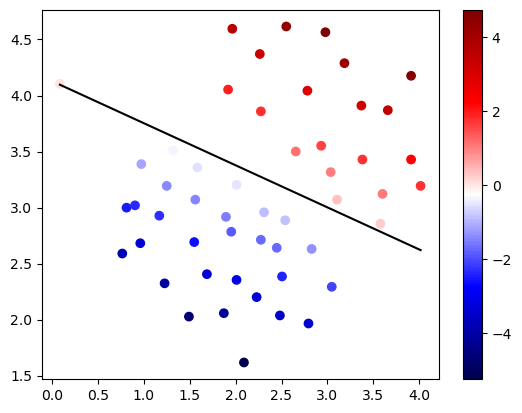

In [90]:
w = svc2.coef_[0]           # w consists of 2 elements
b = svc2.intercept_[0]      # b consists of 1 element
x_points = df['X1'].sort_values()    # generating x-points
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting 

plt.scatter(df['X1'], df['X2'], c = conf_level, cmap='seismic')
plt.plot(x_points, y_points, c='k')
plt.colorbar();

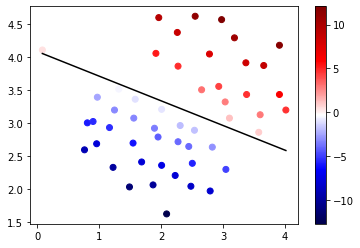

In [42]:
w = svc_2.coef_[0]           # w consists of 2 elements
b = svc_2.intercept_[0]      # b consists of 1 element
x_points = df['x1'].sort_values()    # generating x-points
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting 

plt.scatter(df['x1'], df['x2'], c = conf_level, cmap='seismic')
plt.plot(x_points, y_points, c='k')
plt.colorbar();

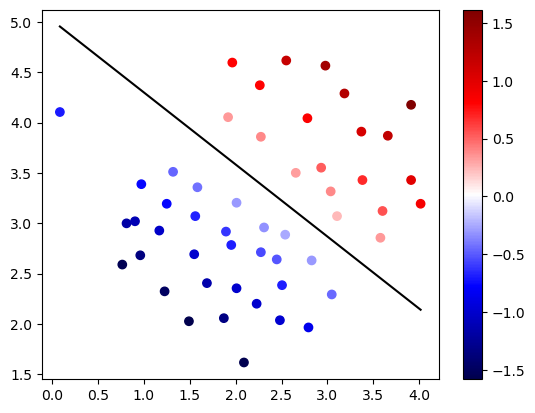

In [91]:
conf_level = svc.decision_function(df[['X1','X2']])
w = svc.coef_[0]           # w consists of 2 elements
b = svc.intercept_[0]      # b consists of 1 element
x_points = df['X1'].sort_values()    # generating x-points
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting 

plt.scatter(df['X1'], df['X2'], c = conf_level, cmap='seismic')
plt.plot(x_points, y_points, c='k')
plt.colorbar();

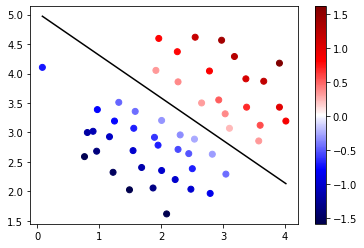

In [47]:
conf_level = svc.decision_function(df[['x1','x2']])
w = svc.coef_[0]           # w consists of 2 elements
b = svc.intercept_[0]      # b consists of 1 element
x_points = df['x1'].sort_values()    # generating x-points
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting 

plt.scatter(df['x1'], df['x2'], c = conf_level, cmap='seismic')
plt.plot(x_points, y_points, c='k')
plt.colorbar();

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [103]:
from scipy.io import loadmat

mat = loadmat('data/ejer_1_data2.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [2]:
from scipy.io import loadmat

mat = loadmat('data/ejer_1_data2.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [104]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

In [105]:
df = pd.DataFrame(mat['X'], columns=['X1', 'X2'])
df['y'] = mat['y']
df.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [106]:
df['y'].value_counts()

1    480
0    383
Name: y, dtype: int64

In [7]:
df['y'].value_counts()

1    480
0    383
Name: y, dtype: int64

#### 3. Plot a scatterplot with the data

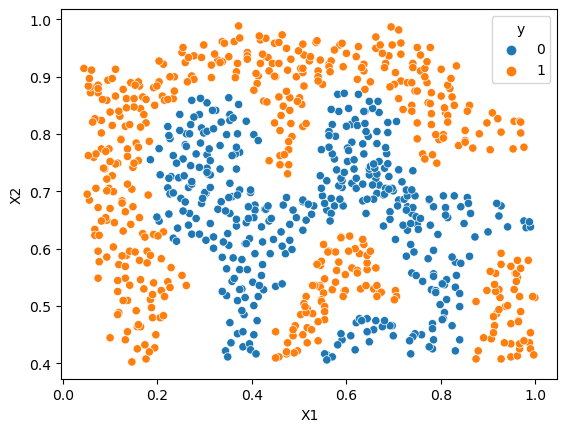

In [107]:
sns.scatterplot(data=df, x='X1', y="X2", hue="y");

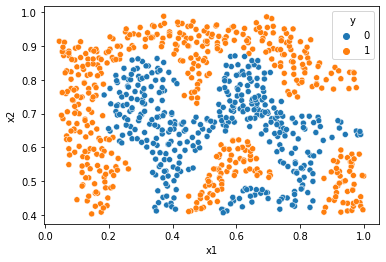

In [9]:
sns.scatterplot(data=df, x='x1', y="x2", hue="y");

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


In [110]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [113]:
X = df[['X1', 'X2']].values
y = df['y'].values

In [114]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with RBF kernel and specified parameters
svm = SVC(C=100, gamma=10, probability=True, kernel='rbf')

# Train the classifier
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9595375722543352


#### 5. Fit the classifier and get the score

In [ ]:
svc.fit(df[['x1','x2']], df['y'])
svc.score(df[['x1','x2']], df['y'])

In [21]:
svc.fit(df[['x1','x2']], df['y'])
svc.score(df[['x1','x2']], df['y'])

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [116]:
probability_0 = svc.predict_proba(df[['X1','X2']])[:,0]
probability_0

array([3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.37517492e-07,
       4.17579588e-03, 9.65651971e-06, 4.05626543e-08, 7.87003089e-03,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 9.25204502e-03,
       3.08785850e-12, 3.00000090e-14, 3.00000090e-14, 1.61376032e-10,
       2.21273151e-01, 5.54333286e-01, 3.00000090e-14, 3.00000090e-14,
       1.08753552e-02, 5.48375072e-06, 6.39536986e-03, 1.02581749e-01,
       1.39672378e-02, 1.08722369e-06, 5.30926159e-07, 1.15806705e-07,
       1.60460431e-06, 1.76090900e-02, 1.37820426e-01, 2.18318013e-02,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 1.08931357e-13, 1.33220345e-10, 3.00000090e-14,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 5.67227085e-11,
       3.00000090e-14, 3.00000090e-14, 2.02064288e-09, 7.80017188e-08,
       5.40781070e-06, 3.05322582e-14, 3.00000090e-14, 3.00000090e-14,
      

In [14]:
probability_0 = svc.predict_proba(df[['x1','x2']])[:,0]
probability_0

array([3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 1.94004333e-06,
       7.81922850e-03, 3.64288094e-03, 2.85829666e-07, 1.38258813e-02,
       3.00000090e-14, 3.00000090e-14, 1.82296958e-13, 1.59871376e-02,
       5.42095102e-11, 3.00000090e-14, 3.00000090e-14, 1.93570101e-09,
       2.62480091e-01, 5.74566838e-01, 2.37203020e-13, 3.00000090e-14,
       1.84817204e-02, 2.82388615e-03, 1.14741976e-02, 1.35197232e-01,
       2.31251883e-02, 5.58543942e-06, 2.92181325e-06, 7.37731684e-07,
       7.94129980e-06, 2.84489599e-02, 1.74723189e-01, 3.44655803e-02,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 2.63885905e-12, 1.62774432e-09, 3.79649840e-13,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 3.00000090e-14, 3.42765045e-14, 7.52440197e-10,
       6.97277654e-13, 3.00000090e-14, 1.90030736e-08, 5.16145454e-07,
       2.80620996e-03, 8.35999934e-13, 3.00000090e-14, 3.00000090e-14,
      

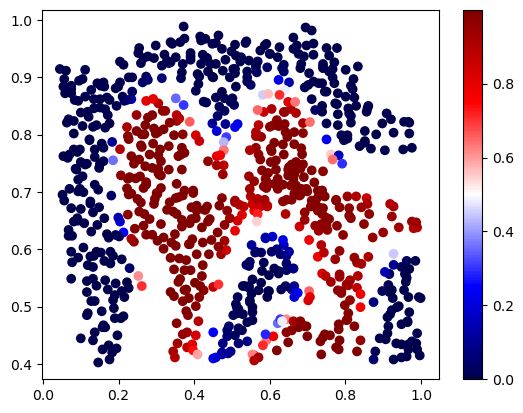

In [117]:
plt.scatter(df['X1'], df['X2'], c = probability_0, cmap='seismic')
plt.colorbar();

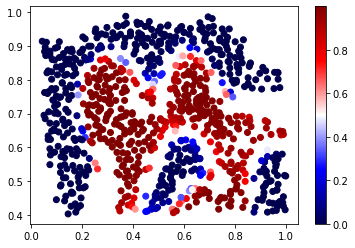

In [17]:
plt.scatter(df['x1'], df['x2'], c = probability_0, cmap='seismic')
plt.colorbar();

## Exercise 3

For the third data set we're given both training and validation sets and tasked with finding optimal hyper-parameters for an SVM model based on validation set performance.  Although we could use scikit-learn's built-in grid search to do this quite easily, in the spirit of following the exercise directions we'll implement a simple grid search from scratch.

#### 1. Load the data `ejer_1_data3.mat`

In [118]:
from scipy.io import loadmat

mat3 = loadmat('data/ejer_1_data3.mat')
mat3

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:29:06 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-1.58986e-01,  4.23977e-01],
        [-3.47926e-01,  4.70760e-01],
        [-5.04608e-01,  3.53801e-01],
        [-5.96774e-01,  1.14035e-01],
        [-5.18433e-01, -1.72515e-01],
        [-2.92627e-01, -2.07602e-01],
        [-1.58986e-01, -4.38596e-02],
        [-5.76037e-02,  1.43275e-01],
        [-7.14286e-02,  2.71930e-01],
        [-2.97235e-01,  3.47953e-01],
        [-4.17051e-01,  2.01754e-01],
        [-4.40092e-01,  8.77193e-03],
        [-3.24885e-01, -3.21637e-02],
        [-2.46544e-01,  5.55556e-02],
        [-2.18894e-01,  2.01754e-01],
        [-3.43318e-01,  1.60819e-01],
        [-5.09217e-01,  7.89474e-02],
        [-3.84793e-01, -9.06433e-02],
        [-1.49770e-01,  1.25731e-01],
        [-1.95853e-01,  3.24561e-01],
        [-3.91705e-02, -2.19298e-01],
        [-1.08295e-01, -3.01170e-01],
        [-1.86636e-0

#### 2. Create a DataFrame with the features and target

In [119]:
df = pd.DataFrame(mat3['X'], columns=['X1', 'X2'])
df['y'] = mat3['y']
df.head()

,X1,X2,y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1


#### 3. Get the validation data from the dataset `Xval` and `yval`

In [126]:
# Get the validation data
Xval = df[['X1', 'X2']]  # Features for validation data
yval = df['y']  # Target variable for validation data

# Remove the validation data from the training data
df = df.drop(['X1', 'X2', 'y'], axis=1)  # Drop columns used for validation

# Print the training data
print(df.head())

# Print the validation data
print(Xval)
print(yval)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
           X1        X2
0   -0.158986  0.423977
1   -0.347926  0.470760
2   -0.504608  0.353801
3   -0.596774  0.114035
4   -0.518433 -0.172515
..        ...       ...
202 -0.246429 -0.036550
203 -0.321083 -0.433626
205 -0.385369 -0.515497
207 -0.124078 -0.126608
210 -0.153111  0.184503

[158 rows x 2 columns]
0      1
1      1
2      1
3      1
4      1
      ..
202    1
203    1
205    1
207    1
210    0
Name: y, Length: 158, dtype: uint8


In [123]:
df.keys()

Index(['X1', 'X2', 'y'], dtype='object')

#### 4. Try different hyperparameters
You are going to find the best hyperparameters that best fit your model.
1. Try C from 0.01 to 100
2. Try gamma from 0.01 to 100

Train the model and then get the score with the validation data. Which combination of hyperparameters trains the best model in validation score?

In [134]:
from sklearn import svm

X = mat3['X']
Xval = mat3['Xval']
y = mat3['y'].ravel()
yval = mat3['yval'].ravel()

c_values = np.arange(0.01, 100.01, 0.01)
gamma_values = np.arange(0.01, 100.01, 0.01)


best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.97, {'C': 0.3, 'gamma': 69.49000000000001})

## Exercise 4
Now we'll move on to the second part of the exercise. In this part our objective is to use SVMs to build a spam filter.  In the exercise text, there's a task involving some text pre-processing to get our data in a format suitable for an SVM to handle.  However, the task is pretty trivial (mapping words to an ID from a dictionary that's provided for the exercise) and the rest of the pre-processing steps such as HTML removal, stemming, normalization etc. are already done.  Rather than reproduce these pre-processing steps, I'm going to skip ahead to the machine learning task which involves building a classifier from pre-processed train and test data sets consisting of spam and non-spam emails transformed to word occurance vectors.

#### 1. Load the data `spamTrain.mat` and `spamTest.mat`

#### 2. Create a DataFrame with the features and target, for train and test
Be careful with the test dimensions

#### 3. Fit a SVC and get the accuracy in train and test

Each document has been converted to a vector with 1,899 dimensions corresponding to the 1,899 words in the vocabulary.  The values are binary, indicating the presence or absence of the word in the document.  At this point, training and evaluation are just a matter of fitting the testing the classifer. 